# Parameter recovery of the hierarchical DDM with starting point bias

In [1]:
import rlssm
import pandas as pd

## Simulate group data

In [2]:
from rlssm.random import simulate_hier_ddm

In [3]:
data = simulate_hier_ddm(n_trials=200, 
                         n_participants=10,
                         gen_mu_drift=.6, gen_sd_drift=.1,
                         gen_mu_threshold=.5, gen_sd_threshold=.1,
                         gen_mu_ndt=0, gen_sd_ndt=.01,
                         gen_mu_rel_sp=.1, gen_sd_rel_sp=.01)

In [4]:
data.head()

drift  threshold       ndt    rel_sp        rt  accuracy
participant trial                                                             
1           1      0.583137   0.987302  0.686735  0.539299  0.998735       1.0
            1      0.583137   0.987302  0.686735  0.539299  1.070735       1.0
            1      0.583137   0.987302  0.686735  0.539299  1.042735       1.0
            1      0.583137   0.987302  0.686735  0.539299  0.941735       0.0
            1      0.583137   0.987302  0.686735  0.539299  0.728735       1.0

In [5]:
data.groupby('participant').describe()[['rt', 'accuracy']]

rt                                                    \
             count      mean       std       min       25%       50%   
participant                                                            
1            200.0  0.943520  0.208699  0.718735  0.797485  0.892235   
2            200.0  0.940994  0.209900  0.727699  0.800699  0.864699   
3            200.0  0.989416  0.231368  0.724431  0.829181  0.927931   
4            200.0  0.943833  0.199141  0.724853  0.810603  0.881353   
5            200.0  0.908154  0.169132  0.713534  0.779534  0.863034   
6            200.0  0.975655  0.221267  0.721440  0.805190  0.922940   
7            200.0  0.920378  0.194863  0.715958  0.779958  0.863958   
8            200.0  0.968912  0.232065  0.737607  0.813607  0.907607   
9            200.0  0.945165  0.211198  0.721690  0.786440  0.887690   
10           200.0  0.916707  0.182138  0.713282  0.793032  0.854282   

                                accuracy                                       \
                  75%       max    count   mean       std  min  25%  50%  75%   
participant                                                                     
1            1.022485  2.072735    200.0  0.705  0.457187  0.0  0.0  1.0  1.0   
2            1.023449  1.871699    200.0  0.710  0.454901  0.0  0.0  1.0  1.0   
3            1.100681  2.109431    200.0  0.665  0.473175  0.0  0.0  1.0  1.0   
4            1.024603  1.693853    200.0  0.695  0.461563  0.0  0.0  1.0  1.0   
5            0.988284  1.574534    200.0  0.715  0.452547  0.0  0.0  1.0  1.0   
6            1.078690  2.130440    200.0  0.695  0.461563  0.0  0.0  1.0  1.0   
7            0.986958  1.901958    200.0  0.640  0.481205  0.0  0.0  1.0  1.0   
8            1.024607  2.179607    200.0  0.650  0.478167  0.0  0.0  1.0  1.0   
9            1.031690  2.206690    200.0  0.705  0.457187  0.0  0.0  1.0  1.0   
10           0.991532  2.191282    200.0  0.660  0.474898  0.0  0.0  1.0  1.0   

                  
             max  
participant       
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0  
8            1.0  
9            1.0  
10           1.0

## Initialize the model

In [6]:
model = rlssm.DDModel(hierarchical_levels = 2, starting_point_bias=True)

Using cached StanModel


## Fit

In [7]:
# sampling parameters
n_iter = 5000
n_chains = 2
n_thin = 1

In [8]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
1.0 of 5000 iterations ended with a divergence (0.02%)
  Try running with larger adapt_delta to remove the divergences
0 of 5000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [9]:
model_fit.rhat.describe()

,rhat
count,48.000000
mean,1.000216
std,0.000832
min,0.999608
25%,0.999785
50%,0.999931
75%,1.000250
max,1.003504


### calculate wAIC

In [10]:
model_fit.waic

{'lppd': -215.38853693761558,
 'p_waic': 19.404973506529767,
 'waic': 469.5870208882907,
 'waic_se': 93.08498988214684}

## Posteriors

In [11]:
model_fit.samples.describe()

,chain,draw,transf_mu_drift,transf_mu_threshold,transf_mu_ndt,transf_mu_rel_sp,drift_sbj[1],drift_sbj[2],drift_sbj[3],drift_sbj[4],...,rel_sp_sbj[1],rel_sp_sbj[2],rel_sp_sbj[3],rel_sp_sbj[4],rel_sp_sbj[5],rel_sp_sbj[6],rel_sp_sbj[7],rel_sp_sbj[8],rel_sp_sbj[9],rel_sp_sbj[10]
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.50000,1249.500000,0.589375,1.022242,0.695842,0.540491,0.615980,0.610770,0.555651,0.597908,...,0.533295,0.549152,0.542901,0.543731,0.551264,0.533914,0.540464,0.541557,0.535163,0.533811
std,0.50005,721.759958,0.063240,0.020795,0.002528,0.010047,0.090463,0.088556,0.087786,0.084213,...,0.014411,0.015547,0.013825,0.013736,0.016304,0.014446,0.013413,0.013768,0.014113,0.014361
min,0.00000,0.000000,0.310927,0.921859,0.686678,0.495924,0.285271,0.279029,0.103746,0.281845,...,0.463370,0.486399,0.477806,0.486835,0.496881,0.461361,0.484642,0.482194,0.463834,0.469532
25%,0.00000,624.750000,0.547754,1.009701,0.694202,0.533972,0.558756,0.554155,0.503171,0.545284,...,0.525066,0.538592,0.534241,0.534627,0.539878,0.525499,0.532263,0.532903,0.527087,0.525269
50%,0.50000,1249.500000,0.590838,1.022053,0.695765,0.540590,0.609461,0.607050,0.564436,0.595910,...,0.534618,0.547207,0.542336,0.543294,0.549172,0.534935,0.540570,0.541297,0.536049,0.535202
75%,1.00000,1874.250000,0.631290,1.035082,0.697352,0.546847,0.667059,0.660652,0.615438,0.649785,...,0.543135,0.558301,0.550851,0.552077,0.561442,0.543638,0.548470,0.549809,0.544619,0.543486
max,1.00000,2499.000000,0.819045,1.161290,0.706705,0.574957,1.068503,1.049338,0.938611,0.946189,...,0.588013,0.620178,0.611438,0.607811,0.631434,0.584709,0.604728,0.597346,0.587530,0.580611


In [12]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

Here we plot the estimated posterior distributions against the generating parameters, to see whether the model parameters are recovering well:

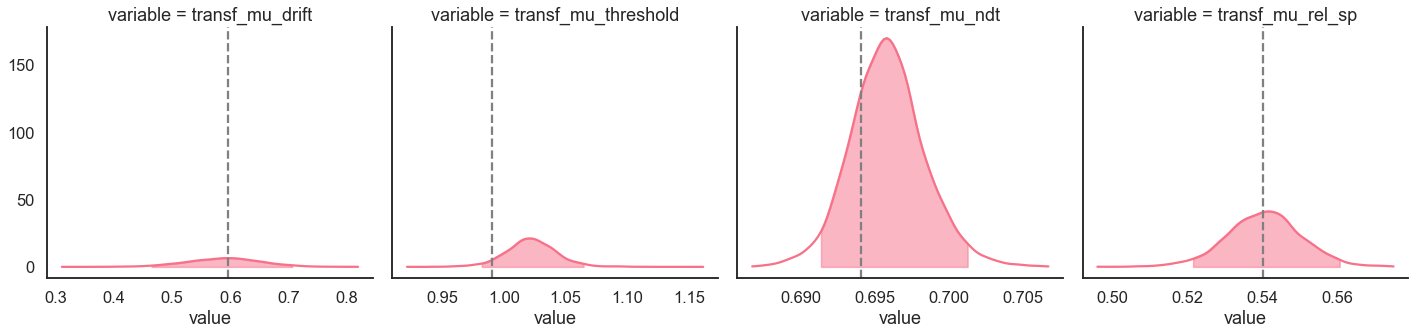

In [13]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

for i, ax in enumerate(g.axes.flatten()):
    ax.axvline(data[['drift', 'threshold', 'ndt', 'rel_sp']].mean().values[i], color='grey', linestyle='--')

## Posterior predictives

### Ungrouped

In [14]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.6945,0.962391,2.197891,0.772538,0.835900,0.912849,1.024506,1.284913,0.763387,0.817667,0.889661,0.989880,1.210068
2,0.6875,0.972205,2.128831,0.789912,0.846612,0.917595,1.029947,1.297444,0.761145,0.821161,0.896144,1.013587,1.272462
3,0.7185,0.953535,1.943573,0.775542,0.840298,0.903853,0.995460,1.212840,0.759105,0.807002,0.882815,0.992786,1.242357
4,0.6690,0.964448,1.639886,0.766117,0.842167,0.935386,1.045216,1.274126,0.760460,0.816299,0.890960,0.997052,1.239141
5,0.7140,0.958068,2.491421,0.774103,0.835102,0.902298,1.046443,1.293283,0.758927,0.814182,0.882505,0.998341,1.214300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.6940,0.965422,1.790321,0.776907,0.840134,0.915141,1.034274,1.291142,0.760316,0.817846,0.893299,1.006333,1.251930
97,0.6860,0.965237,1.802255,0.781694,0.838914,0.916765,1.034170,1.276470,0.758694,0.810400,0.892872,1.002173,1.243979
98,0.6900,0.945802,1.970541,0.778855,0.830806,0.901765,1.005698,1.246457,0.760183,0.813759,0.873622,0.978405,1.198244


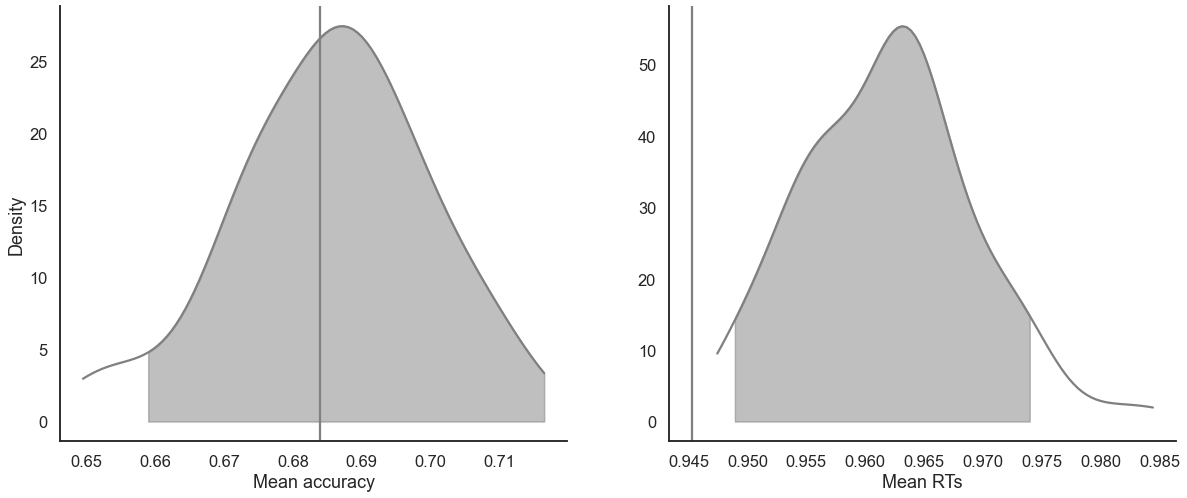

In [15]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

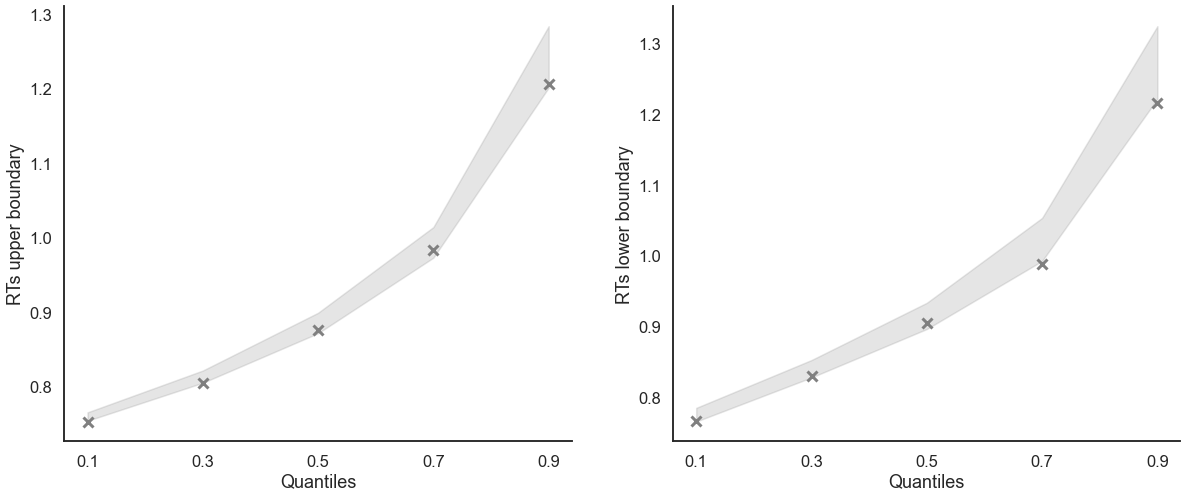

In [16]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [17]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['participant'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
participant sample                                                       
1           1               0.665  1.006593  1.921762         0.845138   
            2               0.725  0.981561  1.769151         0.905091   
            3               0.765  0.964544  1.303737         0.900769   
            4               0.620  0.942311  1.914656         0.827521   
            5               0.675  0.970690  1.987422         0.808845   
...                           ...       ...       ...              ...   
10          96              0.600  0.954822  1.784016         0.835707   
            97              0.585  0.905839  1.457801         0.799894   
            98              0.695  0.935979  2.440021         0.822954   
            99              0.670  0.938059  1.825178         0.809854   
            100             0.660  0.950247  1.511256         0.811802   

                    quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
participant sample                                                    
1           1             0.839538         0.927538        0.910538   
            2             0.817091         0.953291        0.884291   
            3             0.807769         0.979769        0.888769   
            4             0.823121         0.869521        0.894021   
            5             0.813845         0.856645        0.900645   
...                            ...              ...             ...   
10          96            0.797307         0.910407        0.857407   
            97            0.796294         0.844694        0.862694   
            98            0.795354         0.878954        0.865954   
            99            0.800854         0.870854        0.856354   
            100           0.814502         0.877602        0.882102   

                    quant_70_rt_low  quant_70_rt_up  
participant sample                                   
1           1              1.039138        1.027538  
            2              1.132491        1.004091  
            3              1.076569        1.010369  
            4              0.961521        1.006721  
            5              0.952645        1.020445  
...                             ...             ...  
10          96             1.015407        0.976707  
            97             0.924294        0.975094  
            98             0.965954        0.976154  
            99             0.997354        0.961354  
            100            1.012102        0.987502  

[1000 rows x 9 columns]

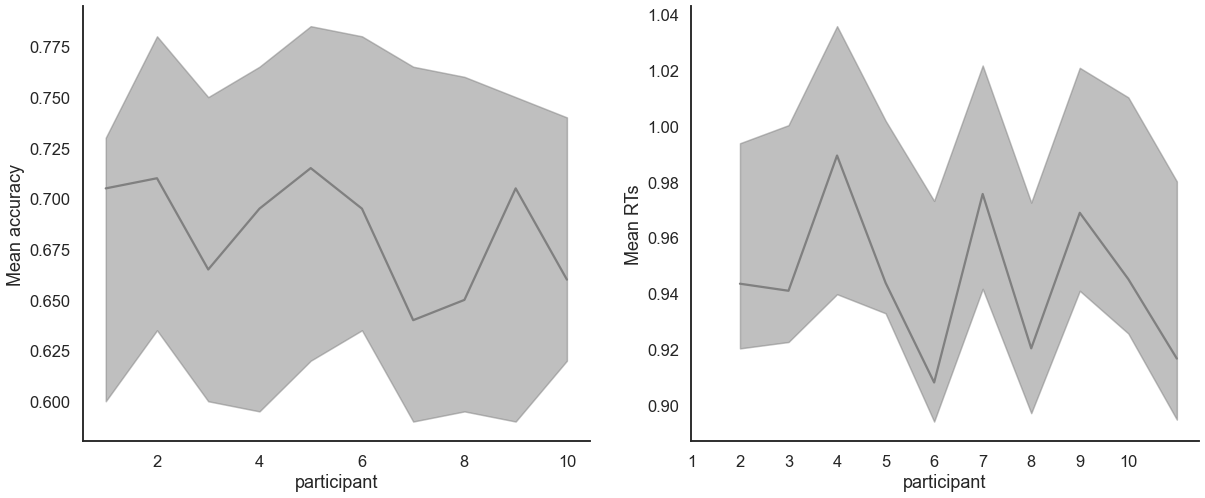

In [18]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['participant'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));